In [1]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [33]:
df = pd.read_csv('all_results.csv')

In [3]:
df.head()

,machine,limits,benchmark,lower_is_better,result
0,192.168.140.81,with_limits,crafty,NaN,59.09
1,192.168.140.81,with_limits,stream-copy,NaN,3943.46
2,192.168.140.81,with_limits,stream-add,NaN,4111.40
3,192.168.140.81,with_limits,stream-scale,NaN,3749.34
4,192.168.140.81,with_limits,stream-triad,NaN,4210.84


In [4]:
df['machine'].unique()

array(['192.168.140.81', '192.168.140.85', 'dwill.soe.ucsc.edu',
       'nibbler.soe.ucsc.edu', 'issdm-12'], dtype=object)

In [5]:
df['benchmark'].unique()

array(['crafty', 'stream-copy', 'stream-add', 'stream-scale',
       'stream-triad', 'c-ray', 'stressng-cpu-ackermann',
       'stressng-cpu-bitops', 'stressng-cpu-callfunc',
       'stressng-cpu-cdouble', 'stressng-cpu-cfloat',
       'stressng-cpu-clongdouble', 'stressng-cpu-correlate',
       'stressng-cpu-crc16', 'stressng-cpu-decimal32',
       'stressng-cpu-decimal64', 'stressng-cpu-decimal128',
       'stressng-cpu-dither', 'stressng-cpu-djb2a', 'stressng-cpu-double',
       'stressng-cpu-euler', 'stressng-cpu-explog', 'stressng-cpu-fft',
       'stressng-cpu-fibonacci', 'stressng-cpu-float',
       'stressng-cpu-fnv1a', 'stressng-cpu-gamma', 'stressng-cpu-gcd',
       'stressng-cpu-gray', 'stressng-cpu-hamming', 'stressng-cpu-hanoi',
       'stressng-cpu-hyperbolic', 'stressng-cpu-idct',
       'stressng-cpu-int128', 'stressng-cpu-int64', 'stressng-cpu-int32',
       'stressng-cpu-int16', 'stressng-cpu-int8',
       'stressng-cpu-int128float', 'stressng-cpu-int128double',
     

In [18]:
df['limits'].unique()

array(['with_limits', 'no_limits'], dtype=object)

In [34]:
df.fillna(True, inplace=True)

In [35]:
%run normalize.py

In [36]:
df = obtain_speedup(df, 'issdm-12')

In [49]:
df.head()

,benchmark,base_result,machine,limits,lower_is_better,result,speedup
0,crafty,74.23,192.168.140.81,with_limits,True,59.09,1.256219
1,crafty,74.23,192.168.140.81,with_limits,True,60.79,1.221089
2,crafty,74.23,192.168.140.81,with_limits,True,59.25,1.252827
3,crafty,74.23,192.168.140.85,with_limits,True,66.64,1.113896
4,crafty,74.23,192.168.140.85,with_limits,True,67.10,1.106259


In [71]:
machine = '192.168.140.81'
subdf = df[df["machine"] == machine]

/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


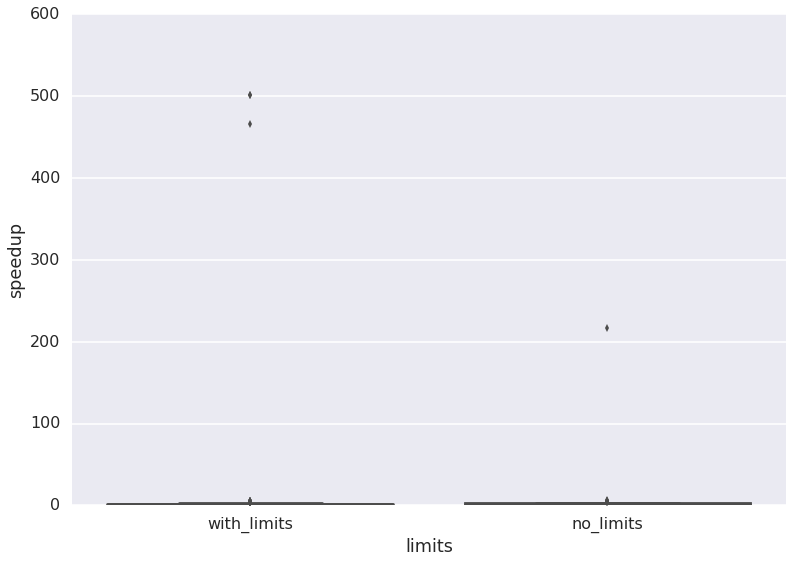

In [72]:
sns.boxplot(subdf.speedup, groupby=subdf.limits)

The above might look like it shows that with limits we get lower/higher variability, but we need to normalize speedups w.r.t. the max/min values of each 'limits' group, otherwise this is an optical illusion

In [73]:

subdf['speedup_normalized'] = subdf.apply(
  lambda x:
    (x['result'] - subdf[subdf['limits'] == x['limits']]['speedup'].mean()) /
    (subdf[subdf['limits'] == x['limits']]['speedup'].max() -
     subdf[subdf['limits'] == x['limits']]['speedup'].min()),
  axis=1
)


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
subdf.head()

,benchmark,base_result,machine,limits,lower_is_better,result,speedup,speedup_normalized
0,crafty,74.23,192.168.140.81,with_limits,True,59.09,1.256219,0.107382
1,crafty,74.23,192.168.140.81,with_limits,True,60.79,1.221089,0.110778
2,crafty,74.23,192.168.140.81,with_limits,True,59.25,1.252827,0.107702
12,crafty,74.23,192.168.140.81,no_limits,True,26.26,2.826733,0.104758
17,stream-copy,2781.70,192.168.140.81,with_limits,True,3943.46,1.417644,7.866462


/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


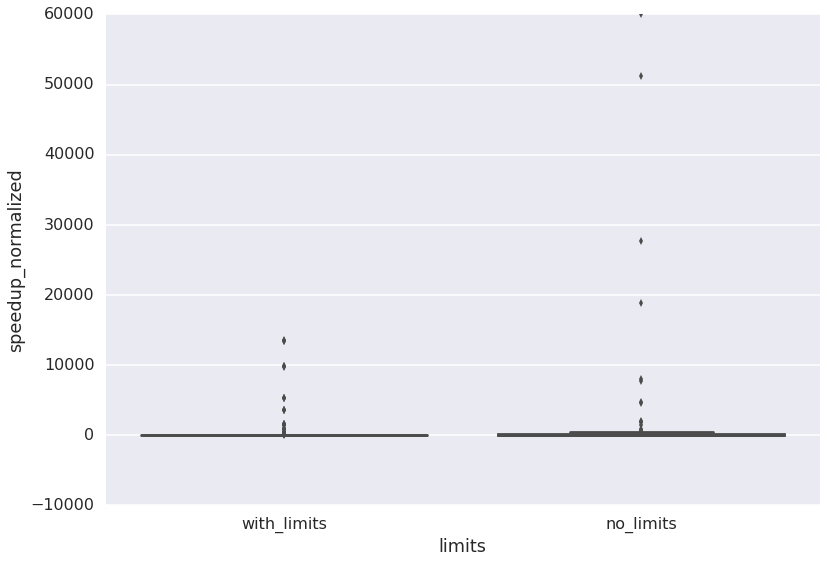

In [75]:
sns.boxplot(subdf.speedup_normalized, groupby=subdf.limits)

In [76]:
subdf[subdf['speedup'] > 25]

,benchmark,base_result,machine,limits,lower_is_better,result,speedup,speedup_normalized
1671,stressng-memory-memfd,1343.897469,192.168.140.81,with_limits,False,2.886764,465.537699,-0.004885
1672,stressng-memory-memfd,1343.897469,192.168.140.81,with_limits,False,2.681308,501.209659,-0.005295
1673,stressng-memory-memfd,1343.897469,192.168.140.81,with_limits,False,2.679100,501.622735,-0.005300
1683,stressng-memory-memfd,1343.897469,192.168.140.81,no_limits,False,6.192943,217.004657,0.011856
